## **Project: Wrangle and Analyze Data**





### Introduction


This project involves wrangling data from three different sources, all of which are connected to the popular WeRateDogs (@dog rates) Twitter account. WeRateDogs is a Twitter account that posts photos of dogs sent by their owners, along with a humorous caption and a rating that nearly always surpasses 10/10. 

# The Data


This project encompass three dataset:

1-Twitter archive (csv file)

2-Image predictions for dogs(tsv file), 

3- Twitter  API .

# **Twitter  API .**

As a part of udacity student  , i always want to learn and explore, i know the knowledge remain by  implementation, I know how udacity care about  thier  students to achieve the full benefit and build strong cadres for the future, but because of the complexities of Twitter after communicating with them and the justification that I need a programmed account with boring details 
But I do not see any responses from them except that the email is repeated more than once to no avail. However, I go back to fill in all the details for them. 
‏And I hope to get a developer account in the future, but for lack of time I have completed the project with the data given by udacity, I hope you will accept it , and thank you

 needed packages 

In [1]:
# Import statements
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings
from IPython.display import Image
from functools import reduce
import re
import seaborn as sns
import datetime
#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

% matplotlib inline

# **Gathering Data**

The WeRateDogs Twitter archive

In [2]:
# Open the csv file
df_archive = pd.read_csv('twitter-archive-enhanced-2.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Tweet image prediction

In [3]:
# Download the image prediction that's provided by  Udacity 
url = 'https://video.udacity-data.com/topher/2018/November/5bf60c69_image-predictions-3/image-predictions-3.tsv'
image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [4]:
# Showing the data in the df image 
df_image = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Twitter API & JSON

In [5]:
with open('/content/tweet-json') as json_f:
    df_tweets_API = pd.DataFrame(columns = ['tweet_id','favorites','retweets']) #need (tweet ID, retweet count, and favorite count)
    
    for info in json_f:
        tweets = json.loads(info)
        data = {'tweet_id': tweets['id'],'favorites': tweets['favorite_count'],
                                      'retweets': tweets['retweet_count']}
        ser = pd.Series(data)
        df_tweets_API = df_tweets_API.append(data,ignore_index=True)
df_tweets_API.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


# **Assess**

1-Twitter Archived Enhanced Data

In [6]:
df_archive.info() # get the info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
df_archive.describe() # Take an overview  

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [8]:
print("sum of duplicated ",df_archive.tweet_id.duplicated().sum())
print("sum of null in rating_numerator ",sum(df_archive.rating_numerator.isnull()))
print("sum of null in rating_denominator ",sum(df_archive.rating_denominator.isnull()))

sum of duplicated  0
sum of null in rating_numerator  0
sum of null in rating_denominator  0


In [9]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
862,762699858130116608,NaN,NaN,2016-08-08 17:19:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leela. She's a Fetty Woof. Lost eye wh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762699858...,11,10,Leela,None,None,None,None
854,765222098633691136,NaN,NaN,2016-08-15 16:22:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gromit. He's pupset because there's no...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765222098...,10,10,Gromit,None,None,None,None
1816,676606785097199616,NaN,NaN,2015-12-15 03:36:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*screeches for a sec and then faints* 12/10 ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676606785...,12,10,None,None,None,None,None
1633,684241637099323392,NaN,NaN,2016-01-05 05:14:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Obi. He got camera shy. 12/10 https://...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684241637...,12,10,Obi,None,None,None,None
1150,726224900189511680,NaN,NaN,2016-04-30 01:41:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm getting super heckin frustrated with you a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/726224900...,9,10,None,None,None,None,None


In [10]:
df_archive.name.sort_values() # very ? its not name 

1035     Abby
1021     Abby
938       Ace
1933     Acro
1327    Adele
        ...  
1031     very
773      very
1097     very
819      very
1385     very
Name: name, Length: 2356, dtype: object

In [11]:
df_archive['name'].value_counts() # none , a .. , it not name 

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Sparky       1
Eleanor      1
JD           1
Furzey       1
Combo        1
Name: name, Length: 957, dtype: int64

In [12]:
df_archive.rating_denominator.describe()  #there is  rating denominator values below 10 as the min =2 and std=7


count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [13]:
df_archive.rating_numerator.sort_values() # rate 


315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [14]:
df_archive.query('rating_numerator ==960') #example

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [15]:
df_archive.query('rating_denominator <=10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2- Image Predictions

In [16]:
df_image.info()# get the info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_image.describe() # Take an overview  

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


3- Twitter api

In [18]:
df_tweets_API.info() # get the info 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2354 non-null   object
 1   favorites  2354 non-null   object
 2   retweets   2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


In [19]:
df_tweets_API.describe()# Take an overview  

,tweet_id,favorites,retweets
count,2354,2354,2354
unique,2354,2007,1724
top,667495797102141441,0,3652
freq,1,179,5


# **Quality:**

**df_archive:**

1-Change the timestamp's datatype from str to datetime.

2- Convert the rating numerator and rating denominator datatypes to float.

3- remove columns with too many missing values such as in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'.

4-some dog’s name are weird , replace the unclear dog name with NaN

5- Remove all rating denominator values below 10

6- Make the source column's content more readable by cleaning it up.

7--Delete retweets


**df_image:**

1-change the Datatype img_num Column to string




**df_tweets_API:**

1- convert  retweets, and favorites to int datatyp and convert tweet_id,to str datatype


# **Tidiness :**

1-Make a master data set out of three distinct dataframes.( df_archive, df_image, df_tweets_API)

2- Create one column for the various dog types: doggo, floofer, pupper, puppo then remove the columns since there’s no need for it 


**The structured as following:**

1- Make a master data set out of three distinct dataframes.( df_archive, df_image, df_tweets_API)

2--Change the timestamp's datatype from str to datetime

3- Convert the rating numerator and rating denominator datatypes to float.

4- change the Datatype img_num Column to string

5- convert  retweets, and favorites to int datatyp and convert tweet_id,to str datatype

6- remove columns with too many missing values such as in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'

7- some dog’s name are weird , replace the unclear dog name with nan

8- Create one column for the various dog types: doggo, floofer, pupper, puppo then remove the columns since there’s no need for it

9- Remove all rating denominator values below 10

10- Make the source column's content more readable by cleaning it up.

11-Delete retweets


# **Cleaning:**

This section consists of the cleaning portion of the data wrangling process:

*   Define
*   Code
* Test



In [20]:
#copy dataframes
archive = df_archive.copy()
image = df_image.copy()
API = df_tweets_API.copy()

 **Define**

instead of three tables, there should be one master table. As a result, I'm combining the three dataframes into one. Then we'll just have to clean and process one dataframe.

**Code:**

In [21]:
df= pd.merge(left=archive,right=API, left_on='tweet_id', right_on='tweet_id', how='inner')
df = df.merge(image, on='tweet_id', how='inner')

**Test:**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

In [23]:
df[df.duplicated(['tweet_id'], keep=False)] #check for duplicated 'tweet_id' , after merge

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [24]:
df.head(3)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


**Define:**

Change the timestamp's datatype from str to datetime

**Code:**

In [25]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


**Test:**

In [26]:
df.iloc[0,3],type(df.iloc[0,3])

(Timestamp('2017-08-01 16:23:56+0000', tz='UTC'),
 pandas._libs.tslibs.timestamps.Timestamp)

**Define:**

Convert the rating numerator and rating denominator datatypes to float.

**Code**

In [27]:
df.rating_numerator = df.rating_numerator.astype('float')
df.rating_denominator = df.rating_denominator.astype('float')
print(df.columns.get_loc("rating_numerator"))
print(df.columns.get_loc("rating_denominator"))

10
11


**Test**

In [28]:
print(type(df.iloc[0,10]))
print(type(df.iloc[0,11]))

<class 'numpy.float64'>
<class 'numpy.float64'>


**Define :**

change the Datatype img_num Column to string

**Code:**

In [29]:
df['img_num'] = df['img_num'].astype(str)
df.columns.get_loc("img_num")

20

**Test:**

In [30]:
type(df.iloc[0,20])

str

**Define**

convert  retweets, and favorites to int datatyp and convert tweet_id,to str datatype

**Code**

In [31]:
df['tweet_id'] = df['tweet_id'].astype(str)
df['favorites'] = df['favorites'].apply(pd.to_numeric, errors='coerce')
df['retweets'] = df['retweets'].apply(pd.to_numeric, errors='coerce')

**Test:**

In [32]:
print(type(df.iloc[0,0]))
print(type(df.iloc[0,17]))
print(type(df.iloc[0,18]))

<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>


**Define:**

remove columns with too many missing values.

**Code:**

In [33]:
#need to remove all rows that have values (not blank or non-null) in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp 
df = df[df.retweeted_status_id.isnull()]
df = df[df.retweeted_status_user_id.isnull()]
df = df[df.retweeted_status_timestamp.isnull()]

In [34]:
df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 
           'retweeted_status_timestamp'], axis=1, inplace=True)


**Test:**

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             1994 non-null   object             
 1   timestamp            1994 non-null   datetime64[ns, UTC]
 2   source               1994 non-null   object             
 3   text                 1994 non-null   object             
 4   retweeted_status_id  0 non-null      float64            
 5   expanded_urls        1994 non-null   object             
 6   rating_numerator     1994 non-null   float64            
 7   rating_denominator   1994 non-null   float64            
 8   name                 1994 non-null   object             
 9   doggo                1994 non-null   object             
 10  floofer              1994 non-null   object             
 11  pupper               1994 non-null   object             
 12  puppo               

**Define:**

some dog’s name are weird , replace the unclear dog name with NAN

**Code:**

In [36]:
df['name'].unique() # get the unique name , and mannuly replace the unclear name with NAN

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [37]:
df.name.replace(['all', 'not', 'the', 'just', 'by', 'a', 'Piper', 'an', 'just', 
             'Ito', 'one', 'Shikha',  'officially', 'my', 'unacceptable', 'incredibly',
               'one', 'his', 'very'],np.NaN, inplace =True) 
df['name'].fillna(value="None", inplace=True) # shaikh isnt dog name :( 

**Test:**

In [38]:
df.name.value_counts()

None       637
Charlie     11
Cooper      10
Lucy        10
Oliver      10
          ... 
Cal          1
Holly        1
Tess         1
Coleman      1
Clybe        1
Name: name, Length: 919, dtype: int64

**Define :**

Create one column for the various dog types: doggo, floofer, pupper, puppo then remove the columns since there’s no need for it 

**Code:**

In [39]:
# Extract the type from the text column then add to  dog_type column
df['dog_type'] = df['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [40]:
df[['dog_type', 'doggo', 'floofer', 'pupper', 'puppo']].sample(5)


,dog_type,doggo,floofer,pupper,puppo
429,pupper,doggo,None,pupper,None
1597,NaN,None,None,None,None
28,pupper,None,None,pupper,None
724,NaN,None,None,None,None
1452,pupper,None,None,pupper,None


In [41]:
df = df.drop(['doggo','floofer', 'pupper','puppo'],axis=1) # no need for it after dog type colums

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             1994 non-null   object             
 1   timestamp            1994 non-null   datetime64[ns, UTC]
 2   source               1994 non-null   object             
 3   text                 1994 non-null   object             
 4   retweeted_status_id  0 non-null      float64            
 5   expanded_urls        1994 non-null   object             
 6   rating_numerator     1994 non-null   float64            
 7   rating_denominator   1994 non-null   float64            
 8   name                 1994 non-null   object             
 9   favorites            1994 non-null   int64              
 10  retweets             1994 non-null   int64              
 11  jpg_url              1994 non-null   object             
 12  img_num             

**Test:**

In [43]:
df.dog_type.value_counts()


pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_type, dtype: int64

**Define:**

Remove all rating denominator values below 10

**Code:**

In [44]:
#check rate that is not 10 
df_rate = df[df['rating_denominator']< 10]
df_rate

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
415,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,5927,1655,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,NaN
2052,666287406224695296,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,https://twitter.com/dog_rates/status/666287406...,1.0,2.0,None,152,71,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,NaN


In [45]:
df.drop([415], inplace=True)
df.drop([2052], inplace=True)

**Test:**

In [46]:
df[df['rating_denominator']==7.0]
df[df['rating_denominator']==2.0]

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type


In [47]:
df.rating_denominator.value_counts() 


10.0     1976
50.0        3
80.0        2
11.0        2
130.0       1
170.0       1
150.0       1
120.0       1
110.0       1
40.0        1
90.0        1
20.0        1
70.0        1
Name: rating_denominator, dtype: int64

**Define:**

Make the source column's content more readable by cleaning it up.

**Code:**

In [48]:
df['source'] = df['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

**Test:**

In [49]:
df.head()

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


**Define:**

Delete retweets

**Code:**

In [50]:
df = df.drop(['retweeted_status_id'] , axis=1)

**Test:**

In [51]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorites',
       'retweets', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1992 non-null   object             
 1   timestamp           1992 non-null   datetime64[ns, UTC]
 2   source              1992 non-null   object             
 3   text                1992 non-null   object             
 4   expanded_urls       1992 non-null   object             
 5   rating_numerator    1992 non-null   float64            
 6   rating_denominator  1992 non-null   float64            
 7   name                1992 non-null   object             
 8   favorites           1992 non-null   int64              
 9   retweets            1992 non-null   int64              
 10  jpg_url             1992 non-null   object             
 11  img_num             1992 non-null   object             
 12  p1                  1992 non-null 

# **Visualization:**

We want to use visualizing to answer certain questions once we finish the wrangling process, which includes gathering, assessing, and cleaning the provided data. 
After gathering, assessing, and cleaning our data,  we used several attributes.



**Visualization 1:Find out the top ten dog names with retweets rate.**


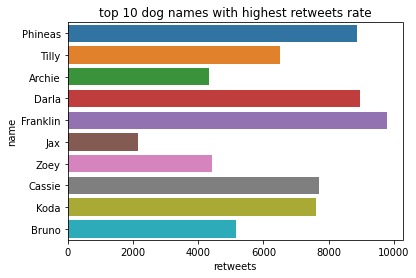

In [53]:
df.drop(df.query('(name == "None")').index ,inplace=True) 
sns.barplot(y="name", x="retweets", data = df[0:10]).set_title('top 10 dog names with highest retweets rate');

After removing None values and unsuitable dog names such as ("the", "very", "all", "a", "an",...), we want to discover the top 10 dog names with the most retweets.

As seen in the graph, the name of the dog "Franklin" received the most retweets, followed by the name of the dog "phineas."

**Visualization 2: Scatter plot between favorites and retweets.**


Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

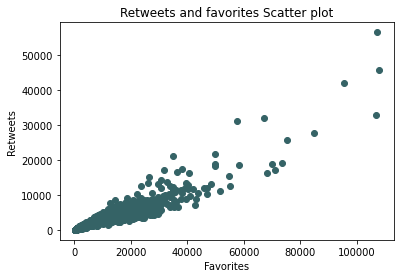

In [54]:
plt.scatter(df['favorites'], df['retweets'],color = '#356366')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

In [55]:
df[['favorites','retweets']].corr()

,favorites,retweets
favorites,1.000000,0.923931
retweets,0.923931,1.000000


As expected in the scatter plot there is a  strong positive correlation (+0.92; shown by correlation result 

so there is strong positive  correlation between the retweets and favorites.

**Visualization 3:Most sources used**

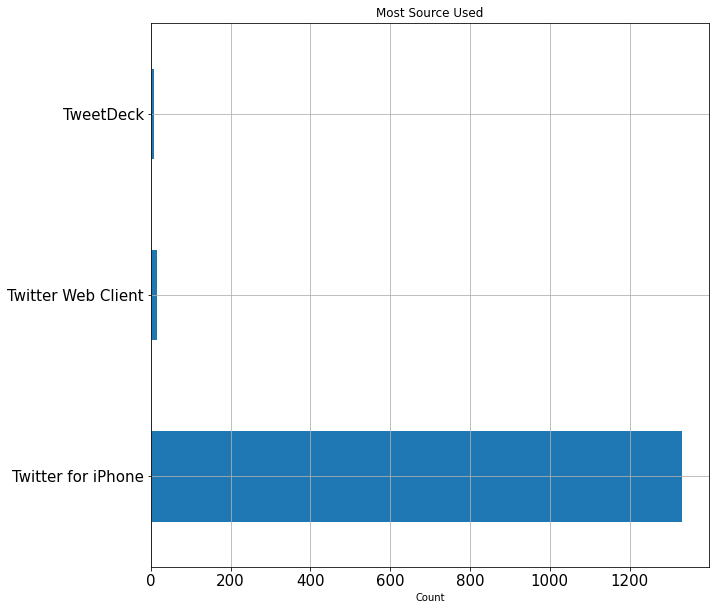

In [56]:
sources = df['source'].value_counts()
sources.plot(kind='barh', figsize=(10,10),grid=True, fontsize =15,
             title = 'Most Source Used').set_xlabel('Count')
 
plt.show()

We can see from the above figure that the most use is by  iphone, and this is expected because using the  iphone is easier than the web

In [57]:
pip install nbconvert


In [57]:
%%shell
jupyter nbconvert --to html /content/Project_Wrangle_and_Analyze_Data.ipynb 

In [58]:
df.to_csv(r'twitter_archive_master.csv', index = False)

# **sources**

http://ocrpsychology2015.blogspot.com/2015/06/
https://video.udacity-data.com/topher/2018/November/5be5fb4c_twitter-api/twitter-api.py
https://towardsdatascience.com/twitter-analytics-weratedogs-a441be7d4a85
https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/
